In [1]:
import requests
from Config import ConsumerKey as key

In [2]:
key

'NXVTMDSSC9WNYXT5YXWIUZ2CEUG2DZSP'

In [3]:
# define our endpoint
endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')

In [4]:
# definte our payload
payload = {'apikey':key,
          'periodType':'month',
          'period':'1',
          'frequencyType':'daily',
          'frequency':'1',
          'startDate':'1651285293',
          'needExtendedHoursData':'true'}

In [5]:
# make a request
content = requests.get(url = endpoint, params = payload)

In [6]:
# convert it to a dictionary
data = content.json()

In [7]:
import pandas as pd

In [8]:
df2 = pd.json_normalize(data['candles']) 

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = df2['datetime']
y = df2['close']

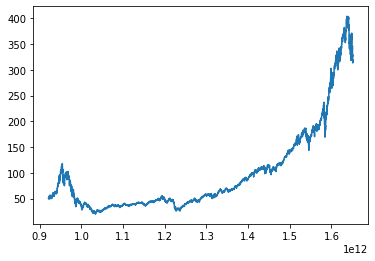

In [11]:
plt.plot(x,y)

In [12]:
import datetime

In [13]:
df = df2.copy()

In [14]:
df['datetime'] = df['datetime'].floordiv(1000)

In [15]:
def datetimeconvert(x):
    return datetime.datetime.fromtimestamp(x)

In [16]:
df['datetime'] = df['datetime'].apply(datetimeconvert)

In [17]:
x = df['datetime']
y = df['close']

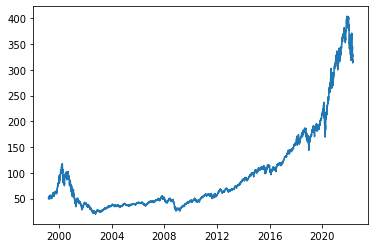

In [18]:
plt.plot(x,y)

In [19]:
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/chains'.format('QQQ')
endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/chains'

In [20]:
payload2 = {'apikey':key,
           'symbol':'QQQ',
           'strikeCount':'30',
           'fromDate':'2022-04-01'}

In [21]:
content2 = requests.get(url = endpoint2, params = payload2)

In [22]:
data2 = content2.json()

In [23]:
optionsChain = pd.json_normalize(data2) 

In [24]:
# optionsChain

In [25]:
# for i in optionsChain.columns:
#     print(i)

In [26]:
# optionsChain['callExpDateMap.2022-05-02:0.304.0']

In [27]:
# counter=0
# for i in range(12,1812):
#     counter+=1
#     print(i)
# print(counter)

In [28]:
# len(optionsChain.transpose())-12

In [29]:
categories = ['putCall','symbol', 'volatility','delta','gamma',
              'theta','vega','rho','openInterest','strikePrice']

In [30]:
# optionsChain.iat[0,12][0].get('putCall')

In [31]:
# for i in range(len(optionsChain.transpose())-12):
#     print(optionsChain.iat[0, i+12][0])

In [32]:
selected = pd.DataFrame(columns = categories, dtype = object)

In [33]:
# selected

In [34]:
for i in range(len(optionsChain.transpose())-12):
    for j in categories:
        # iterate and put values into 'selected' dataframe
        selected.at[i, j] = optionsChain.iat[0, i+12][0].get(j)

In [35]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,CALL,QQQ_050422C304,42.111,0.954,0.011,-0.269,0.021,0.013,32,304
1,CALL,QQQ_050422C305,41.703,0.943,0.013,-0.312,0.025,0.013,119,305
2,CALL,QQQ_050422C306,41.796,0.929,0.015,-0.374,0.029,0.013,58,306
3,CALL,QQQ_050422C307,41.531,0.913,0.018,-0.431,0.034,0.013,177,307
4,CALL,QQQ_050422C308,41.359,0.894,0.021,-0.494,0.04,0.013,101,308
...,...,...,...,...,...,...,...,...,...,...
1735,PUT,QQQ_011924P370,23.922,-0.623,0.004,-0.023,1.631,-3.004,327,370
1736,PUT,QQQ_011924P375,23.73,-0.644,0.004,-0.022,1.6,-3.008,321,375
1737,PUT,QQQ_011924P380,23.547,-0.665,0.004,-0.021,1.565,-3,1769,380
1738,PUT,QQQ_011924P385,23.377,-0.686,0.004,-0.02,1.524,-2.979,1931,385


In [75]:
'''cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'''

'cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'

In [40]:
# a = selected['symbol'][0]
# a[4:10]

In [41]:
# month = a[4:6]
# day = a[6:8]
# year = a[8:10]
# print(month, day, year)

In [42]:
# create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
dateSet = set()
for i in selected['symbol']:
#     print(selected['symbol'][4:10])
#     print(i[4:10])
    a = i[4:10]
    dateSet.add(a)
print(dateSet)

{'011924', '050622', '033123', '051822', '061022', '091622', '050422', '061623', '051622', '121523', '123022', '050922', '071522', '031723', '052322', '060122', '093022', '012023', '052522', '052022', '051122', '052722', '061722', '051322', '053122', '081922', '063022', '060322', '121622'}


In [44]:
# creating dataframes via loop with names = items from dateSet above
d = {}
for name in dateSet:
    d[name] = pd.DataFrame(columns = categories, dtype = object)

In [45]:
d

{'011924': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '050622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '033123': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '051822': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '061022': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '091622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '050422': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, openInterest, strikePrice]
 Index: [],
 '061623': Empty DataFrame
 Column

In [65]:
# loop through all dateSet dates, then loop through all rows in selected(dataframe),
#  check if date from dateSet is within symbol from current row of selected(dataframe),
#  if date from dateSet is within symbol from current row of selected(dataframe) then add the 
#  current row of selected(dataframe) into the dateSet dates' dataframe (dataframes are housed
#  within the 'd' dictionary which is a dictionary of dataframes created for each date)
for date in dateSet:
#     print(i)
    counter = 0
    for symbol in selected['symbol']:
        
        if date in symbol:
#             print(j)
#             print(d[i])
            d[date].loc[len(d[date].index)] = selected.loc[counter]
        counter += 1

In [66]:
d

{'011924':    putCall          symbol  volatility  delta  gamma  theta   vega    rho  \
 0     CALL  QQQ_011924C245      30.313  0.856  0.002 -0.041  1.098  2.977   
 1     CALL  QQQ_011924C250      29.985  0.844  0.002 -0.042  1.145  2.976   
 2     CALL  QQQ_011924C255      29.654  0.831  0.002 -0.042  1.191  2.973   
 3     CALL  QQQ_011924C260      29.324  0.818  0.002 -0.043  1.237  2.965   
 4     CALL  QQQ_011924C265      29.001  0.804  0.003 -0.044  1.283  2.954   
 5     CALL  QQQ_011924C270      28.692  0.790  0.003 -0.044  1.327  2.938   
 6     CALL  QQQ_011924C275      28.389  0.775  0.003 -0.044  1.370  2.918   
 7     CALL  QQQ_011924C280      28.083  0.760  0.003 -0.045  1.411  2.895   
 8     CALL  QQQ_011924C285      27.788  0.745  0.003 -0.045  1.451  2.867   
 9     CALL  QQQ_011924C290      27.478  0.728  0.003 -0.045  1.489  2.836   
 10    CALL  QQQ_011924C295      27.186  0.712  0.003 -0.045  1.525  2.801   
 11    CALL  QQQ_011924C300      26.903  0.695  0.003 

In [69]:
d.get('051822')

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice
0,CALL,QQQ_051822C304,39.021,0.737,0.013,-0.275,0.216,0.093,3,304.0
1,CALL,QQQ_051822C305,38.786,0.725,0.013,-0.279,0.221,0.091,3,305.0
2,CALL,QQQ_051822C306,38.565,0.712,0.013,-0.284,0.225,0.090,0,306.0
3,CALL,QQQ_051822C307,38.334,0.699,0.014,-0.288,0.230,0.088,6,307.0
4,CALL,QQQ_051822C308,38.112,0.685,0.014,-0.291,0.235,0.087,47,308.0
5,CALL,QQQ_051822C309,37.878,0.672,0.014,-0.294,0.239,0.085,50,309.0
6,CALL,QQQ_051822C310,37.650,0.657,0.015,-0.297,0.243,0.084,79,310.0
7,CALL,QQQ_051822C311,37.407,0.643,0.015,-0.300,0.247,0.082,166,311.0
8,CALL,QQQ_051822C312,37.167,0.628,0.015,-0.302,0.250,0.080,227,312.0
9,CALL,QQQ_051822C313,36.909,0.612,0.016,-0.303,0.253,0.078,235,313.0


In [ ]:
# testDF.loc[len(testDF.index)] = selected.loc[counter]

In [46]:
# testDF = pd.DataFrame(columns = categories, dtype = object)

In [47]:
# # Iterate through selected DF and put all rows of specific date into one new dataframe
# counter = 0
# for i in selected['symbol']:
#     if '050222' in i:
#             testDF.loc[len(testDF.index)] = selected.loc[counter]
#     counter+=1

In [48]:
# testDF

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice


In [49]:
# testDF['isCall'] = 1

In [50]:
# #categorize puts and calls with 1 hot for 1 = CALL
# counter = 0
# for i in testDF['putCall']:
#     if i == 'PUT':
#         testDF.at[counter,'isCall'] = 0
#     counter+=1

In [51]:
# testDF

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice,isCall


In [52]:
# testDF.loc[testDF['putCall'] == 'CALL']

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,openInterest,strikePrice,isCall


'cycle through all dates; add them to set; turn into list; create new dfs with list; place relevant items into relevant list'